In [1]:
#Behzad Khadim
#SP20-BCS-019

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
data = pd.read_csv('gdrive/My Drive/Semester6/gender-prediction.csv')
data

,height,weight,beard,hair_length,shoe_size,scarf,eye_color,gender
0,71,176,yes,short,44,no,black,male
1,68,165,no,bald,41,no,black,male
2,62,132,no,medium,37,yes,blue,female
3,65,138,no,long,38,no,gray,female
4,70,197,yes,medium,43,no,gray,male
...,...,...,...,...,...,...,...,...
75,65,99,no,short,39,yes,green,female
76,61,98,no,short,37,no,brown,female
77,67,119,yes,short,40,no,black,male
78,70,190,yes,medium,43,no,gray,male


In [ ]:
data.columns

encoding start


In [4]:
b = data['beard']
h = data['hair_length']
s = data['scarf']
e = data['eye_color']
g = data['gender']
height = data['height']
weight = data['weight']
shoe = data['shoe_size']

In [5]:
labels = preprocessing.LabelEncoder()
b_encoded = labels.fit_transform(b)
h_encoded = labels.fit_transform(h)
s_encoded = labels.fit_transform(s)
e_encoded = labels.fit_transform(e)
g_encoded = labels.fit_transform(g)


In [ ]:
encoded_data = pd.DataFrame(list(zip(height, weight,b_encoded,h_encoded,shoe,s_encoded,e_encoded,g_encoded)),
               columns =['height', 'weight', 'beard', 'hair_length', 'shoe_size', 'scarf','eye_color','gender'])
encoded_data

In [ ]:
X = encoded_data.drop(['gender'],axis = 1)
y = encoded_data['gender']

X

encoded end

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
X_test

Random Forest


In [21]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)


In [22]:
from sklearn.metrics import accuracy_score

print('Model accuracy score  : {0:0.4f}'. format(accuracy_score(y_test, y_pred)*100))

Model accuracy score  : 96.2963


In [23]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
print('confusion matrix for random forest : \n',conf_mat)

confusion matrix for random forest : 
 [[11  1]
 [ 0 15]]


SVM 

In [25]:
from sklearn import svm

clf = svm.SVC(kernel='linear') # Linear Kernel

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


In [26]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)


Accuracy: 100.0


In [27]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
print('confusion matrix for support vector machine : \n',conf_mat)

confusion matrix for support vector machine : 
 [[12  0]
 [ 0 15]]


Multilayer-Perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier


clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)


clf.fit(X_train,y_train)

ypred=clf.predict(X_test)


In [29]:
from sklearn.metrics import accuracy_score

print("Accuracy:",metrics.accuracy_score(y_test, ypred)*100)

Accuracy: 55.55555555555556


In [30]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, ypred)
print('confusion matrix for multilayer perceptron : \n',conf_mat)

confusion matrix for multilayer perceptron : 
 [[ 0 12]
 [ 0 15]]


feature importance


encoding target columns now

In [10]:
b_encoded = labels.fit_transform(b)
h_encoded = labels.fit_transform(h)
s_encoded = labels.fit_transform(s)
e_encoded = labels.fit_transform(e)
g_encoded = labels.fit_transform(g)


In [ ]:
newData = pd.DataFrame(list(zip(height, weight,b_encoded,h_encoded,shoe,s_encoded,e_encoded,g_encoded)),
               columns =['height', 'weight', 'beard', 'hair_length', 'shoe_size', 'scarf','eye_color','gender'])
newData

In [ ]:
X = newData.drop(['gender'], axis=1)
y = newData['gender']
X

[0.13247496 0.09672573 0.27310715 0.04735882 0.21041657 0.14600119
 0.09391557]


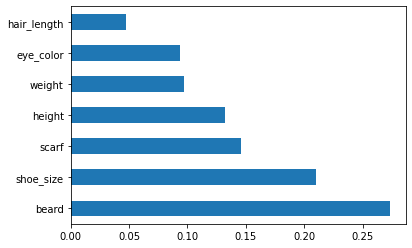

In [50]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

re-running the experiment with test/train 80/20

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train

random forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

from sklearn.metrics import accuracy_score

print('Model accuracy score  : {0:0.4f}'. format(accuracy_score(y_test, y_pred)*100))

from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
print('confusion matrix for random forest : \n',conf_mat)


Model accuracy score  : 93.7500
confusion matrix for random forest : 
 [[6 1]
 [0 9]]


svm 



In [59]:
from sklearn import svm

clf = svm.SVC(kernel='linear') # Linear Kernel

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
print('confusion matrix for random forest : \n',conf_mat)

Accuracy: 87.5
confusion matrix for random forest : 
 [[5 2]
 [0 9]]


multilayer perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier


clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)


clf.fit(X_train,y_train)

ypred=clf.predict(X_test)


In [44]:
from sklearn.metrics import accuracy_score

print("Accuracy:",metrics.accuracy_score(y_test, ypred)*100)
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, ypred)
print('confusion matrix for random forest : \n',conf_mat)

Accuracy: 56.25
confusion matrix for random forest : 
 [[0 7]
 [0 9]]


checking after excluding the important features from dataset with 80/20

In [ ]:
updatedData = pd.DataFrame(list(zip(height, weight,h_encoded,s_encoded,e_encoded,g_encoded)),
               columns =['height', 'weight', 'hair_length', 'scarf','eye_color','gender'])
updatedData

X = updatedData.drop(['gender'], axis=1)
y = updatedData['gender']
X

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train

random forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

from sklearn.metrics import accuracy_score

print('Model accuracy score  : {0:0.4f}'. format(accuracy_score(y_test, y_pred)*100))

from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
print('confusion matrix for random forest : \n',conf_mat)

Model accuracy score  : 87.5000
confusion matrix for random forest : 
 [[5 2]
 [0 9]]


svm

In [58]:
from sklearn import svm

clf = svm.SVC(kernel='linear') # Linear Kernel

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
print('confusion matrix for random forest : \n',conf_mat)

Accuracy: 87.5
confusion matrix for random forest : 
 [[5 2]
 [0 9]]


multilayer perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier


clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)


clf.fit(X_train,y_train)

ypred=clf.predict(X_test)
from sklearn.metrics import accuracy_score

print("Accuracy:",metrics.accuracy_score(y_test, ypred)*100)
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, ypred)
print('confusion matrix for random forest : \n',conf_mat)


monte carlo cross validation

In [67]:
X = newData.drop(['gender'], axis=1)
y = newData['gender']
X

,height,weight,beard,hair_length,shoe_size,scarf,eye_color
0,71,176,1,3,44,0,0
1,68,165,0,0,41,0,0
2,62,132,0,2,37,1,1
3,65,138,0,1,38,0,3
4,70,197,1,2,43,0,3
...,...,...,...,...,...,...,...
75,65,99,0,3,39,1,4
76,61,98,0,3,37,0,2
77,67,119,1,3,40,0,0
78,70,190,1,2,43,0,3


In [68]:
from sklearn.tree import DecisionTreeClassifier 

clf = DecisionTreeClassifier()

In [69]:
from sklearn.model_selection import ShuffleSplit,cross_val_score

mc=ShuffleSplit(n_splits=5,test_size=0.33,random_state=7)

p_recall = cross_val_score(clf,X,y,scoring = 'recall',cv=mc) 

print("Average Cross Validation score :{}".format(p_recall.mean()*100))
print("Standard Deviation score :{}".format(p_recall.std()))

Average Cross Validation score :98.33333333333331
Standard Deviation score :0.03333333333333335


In [70]:
p_precision = cross_val_score(clf,X,y,scoring = 'precision',cv=mc) 

print("Average Cross Validation score :{}".format(p_precision.mean()*100))
print("Standard Deviation score :{}".format(p_precision.std()))

Average Cross Validation score :90.9047619047619
Standard Deviation score :0.05067346893113535


In [71]:
recall = p_recall.mean()
precision = p_precision.mean()

f1_Score = 2*((precision) * (recall)) / (precision + recall)
print('f1_score is :',f1_Score*100)

f1_score is : 94.47324274450595


In [72]:
from sklearn.model_selection import LeavePOut,cross_val_score

lpo = LeavePOut(p=1)
lpo.get_n_splits(X)

p_recall =cross_val_score(clf,X,y,cv=lpo)

#print("cross Validation scores:n {}".format(p_recall))
print("Average Cross Validation score :{}".format(p_recall.mean()*100))
print("F1 score :{}".format(p_recall.std()))

Average Cross Validation score :95.0
F1 score :0.2179449471770337


In [ ]:
collected = [[67,145,'no','short','41','no','brown','male'], [71,166,'yes','short','42','no','black','male'], [65,130,'no','short','41','no','black','male'],[62,110,'no','long','38','yes','brown','female'],[60,111,'no','long','38','yes','black','female']]

collectedData = pd.DataFrame(collected, columns=['height', 'weight', 'beard', 'hair_length', 'shoe_size', 'scarf','eye_color', 'gender'])

collectedData


In [105]:
newb = collectedData['beard']
newh = collectedData['hair_length']
news = collectedData['scarf']
newe = collectedData['eye_color']
newheight = collectedData['height']
newweight = collectedData['weight']
newshoe = collectedData['shoe_size']
newg = collectedData['gender']

In [ ]:
labels = preprocessing.LabelEncoder()
new_b_encoded = labels.fit_transform(newb)
new_h_encoded = labels.fit_transform(newh)
new_s_encoded = labels.fit_transform(news)
new_e_encoded = labels.fit_transform(newe)
new_g_encoded = labels.fit_transform(newg)

Collected_encoded = pd.DataFrame(list(zip(newheight,newweight,new_b_encoded,new_h_encoded,newshoe,new_s_encoded,new_e_encoded,new_g_encoded)), columns =['height', 'weight', 'beard', 'hair_length', 'shoe_size', 'scarf','eye_color','gender'])

Collected_encoded

In [ ]:
X = Collected_encoded.drop(['gender'],axis = 1)
y = Collected_encoded['gender']
X

splitting the gender dataset for training and new collected data for testing model

In [108]:
X_train = newData.drop(['gender'],axis=1)
y_train = newData['gender']

X_test = Collected_encoded.drop(['gender'],axis=1)
y_test = Collected_encoded['gender']


In [109]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)


In [110]:
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score

print('Accuracy', metrics.accuracy_score(y_test,y_pred)*100)
print('Precision', metrics.precision_score(y_test,y_pred)*100)
print('Recall', metrics.recall_score(y_test,y_pred)*100)


Accuracy 100.0
Precision 100.0
Recall 100.0
